In [1]:
import tensorflow as tf
import cleverhans
from cleverhans.utils_keras import KerasModelWrapper
from cleverhans.attacks import FastFeatureAdversaries

import numpy as np
import scipy
import keras
from keras import backend as K
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions

sess = K.get_session()
kmodel = ResNet50(weights='imagenet')
kmodel(kmodel.input)
model = KerasModelWrapper(kmodel)
ffa = FastFeatureAdversaries(model, sess=sess)

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import *
def resize_img(img, size):
    img = np.copy(img)
    if K.image_data_format() == 'channels_first':
        factors = (1, 1,
                   float(size[0]) / img.shape[2],
                   float(size[1]) / img.shape[3])
    else:
        factors = (1,
                   float(size[0]) / img.shape[1],
                   float(size[1]) / img.shape[2],
                   1)
    return scipy.ndimage.zoom(img, factors, order=1)

def get_img_and_process(img_path):
    img = load_img(img_path)
    img_arr = img_to_array(img)
    img_arr = img_arr[np.newaxis, :]
    img_arr = resize_img(img_arr, (224, 224, 3))
    return preprocess_input(img_arr)

vitruvian = get_img_and_process("../imgs/vitruvian.jpg")
wolf = get_img_and_process("../imgs/wolf.jpg")

In [3]:
# 'padlock'
np.argmax(kmodel.predict(vitruvian)[0])

695

In [4]:
kmodel.predict(vitruvian)[0][695]

0.22887054

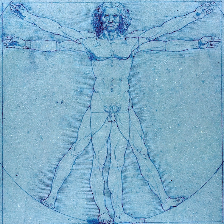

In [5]:
array_to_img(vitruvian[0])

In [6]:
np.argmax(kmodel.predict(wolf)[0])

269

In [7]:
# 'timber wolf, grey wolf, gray wolf, Canis lupus'
kmodel.predict(wolf)[0][269]

0.72107744

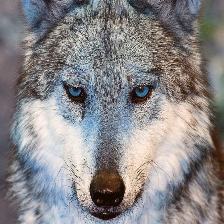

In [8]:
array_to_img(wolf[0])

In [9]:
for layer in kmodel.layers:
    print(layer.name)

input_1
conv1_pad
conv1
bn_conv1
activation_1
pool1_pad
max_pooling2d_1
res2a_branch2a
bn2a_branch2a
activation_2
res2a_branch2b
bn2a_branch2b
activation_3
res2a_branch2c
res2a_branch1
bn2a_branch2c
bn2a_branch1
add_1
activation_4
res2b_branch2a
bn2b_branch2a
activation_5
res2b_branch2b
bn2b_branch2b
activation_6
res2b_branch2c
bn2b_branch2c
add_2
activation_7
res2c_branch2a
bn2c_branch2a
activation_8
res2c_branch2b
bn2c_branch2b
activation_9
res2c_branch2c
bn2c_branch2c
add_3
activation_10
res3a_branch2a
bn3a_branch2a
activation_11
res3a_branch2b
bn3a_branch2b
activation_12
res3a_branch2c
res3a_branch1
bn3a_branch2c
bn3a_branch1
add_4
activation_13
res3b_branch2a
bn3b_branch2a
activation_14
res3b_branch2b
bn3b_branch2b
activation_15
res3b_branch2c
bn3b_branch2c
add_5
activation_16
res3c_branch2a
bn3c_branch2a
activation_17
res3c_branch2b
bn3c_branch2b
activation_18
res3c_branch2c
bn3c_branch2c
add_6
activation_19
res3d_branch2a
bn3d_branch2a
activation_20
res3d_branch2b
bn3d_branch2b


InternalError: Invalid loop structure: Mismatched parent frames for "while_2/while_context": "while_2/while_context" vs "". The node giving this error: node while_2/gradients/while_2/model_1/bn5b_branch2a/cond/FusedBatchNorm_grad/FusedBatchNormGrad/Enter_1 (defined at /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/cleverhans/attacks/__init__.py:1887) This is an internal bug, please file a bug report with instructions on how to reproduce the error.